# Imports

In [1]:
import pandas as pd
import numpy as np
import os 
import xml.etree.ElementTree as ET
from lxml import objectify

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from keras import layers
from keras import models
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from glob import glob

import cv2
import matplotlib.pylab as plt



# To Avoid errors


In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'   #this one solves a dead kernel problem

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') #finds one GPU and one CPU
physical_devices[0]

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

In [4]:
#avoiding out of memory (OOM) errors
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


# Data preparation

In [5]:
# Reading in Images
defect_img_dir = glob('datas/*/*')
defect_img_dir

['datas\\finishing roll printing\\6001.jpg',
 'datas\\finishing roll printing\\6002.jpg',
 'datas\\finishing roll printing\\6003.jpg',
 'datas\\finishing roll printing\\6004.jpg',
 'datas\\finishing roll printing\\6005.jpg',
 'datas\\finishing roll printing\\6006.jpg',
 'datas\\finishing roll printing\\6007.jpg',
 'datas\\finishing roll printing\\6008.jpg',
 'datas\\finishing roll printing\\6009.jpg',
 'datas\\finishing roll printing\\6010.jpg',
 'datas\\finishing roll printing\\6011.jpg',
 'datas\\finishing roll printing\\6012.jpg',
 'datas\\finishing roll printing\\6013.jpg',
 'datas\\finishing roll printing\\6014.jpg',
 'datas\\finishing roll printing\\6015.jpg',
 'datas\\finishing roll printing\\6016.jpg',
 'datas\\finishing roll printing\\6017.jpg',
 'datas\\finishing roll printing\\6018.jpg',
 'datas\\finishing roll printing\\6019.jpg',
 'datas\\finishing roll printing\\6020.jpg',
 'datas\\finishing roll printing\\6021.jpg',
 'datas\\finishing roll printing\\6022.jpg',
 'datas\\f

In [6]:
#Defect tags
defect_tag = {}
for i in defect_img_dir:
    defect = os.path.split(os.path.split(i)[0])[1] #taking defect 
    key = os.path.basename(i)
    defect_tag[key] = defect
print(len(defect_tag)) #correct
defect_tag

1360


{'6001.jpg': 'finishing roll printing',
 '6002.jpg': 'finishing roll printing',
 '6003.jpg': 'finishing roll printing',
 '6004.jpg': 'finishing roll printing',
 '6005.jpg': 'finishing roll printing',
 '6006.jpg': 'finishing roll printing',
 '6007.jpg': 'finishing roll printing',
 '6008.jpg': 'finishing roll printing',
 '6009.jpg': 'finishing roll printing',
 '6010.jpg': 'finishing roll printing',
 '6011.jpg': 'finishing roll printing',
 '6012.jpg': 'finishing roll printing',
 '6013.jpg': 'finishing roll printing',
 '6014.jpg': 'finishing roll printing',
 '6015.jpg': 'finishing roll printing',
 '6016.jpg': 'finishing roll printing',
 '6017.jpg': 'finishing roll printing',
 '6018.jpg': 'finishing roll printing',
 '6019.jpg': 'finishing roll printing',
 '6020.jpg': 'finishing roll printing',
 '6021.jpg': 'finishing roll printing',
 '6022.jpg': 'finishing roll printing',
 '6023.jpg': 'finishing roll printing',
 '6024.jpg': 'finishing roll printing',
 '6025.jpg': 'finishing roll printing',


In [7]:
#name of image
name_img = [] #with .jpg
file_id = [] #without .jpg
dir_dict = {}
for i in defect_img_dir:
    a = os.path.basename(i)
    name_img.append(a)
    dir_dict[a] = i
name_img
#len(name_img)




['6001.jpg',
 '6002.jpg',
 '6003.jpg',
 '6004.jpg',
 '6005.jpg',
 '6006.jpg',
 '6007.jpg',
 '6008.jpg',
 '6009.jpg',
 '6010.jpg',
 '6011.jpg',
 '6012.jpg',
 '6013.jpg',
 '6014.jpg',
 '6015.jpg',
 '6016.jpg',
 '6017.jpg',
 '6018.jpg',
 '6019.jpg',
 '6020.jpg',
 '6021.jpg',
 '6022.jpg',
 '6023.jpg',
 '6024.jpg',
 '6025.jpg',
 '6026.jpg',
 '6027.jpg',
 '6028.jpg',
 '6029.jpg',
 '6030.jpg',
 '6031.jpg',
 '6032.jpg',
 '6033.jpg',
 '6034.jpg',
 '6035.jpg',
 '6036.jpg',
 '6037.jpg',
 '6038.jpg',
 '6039.jpg',
 '6040.jpg',
 '6041.jpg',
 '6042.jpg',
 '6043.jpg',
 '6044.jpg',
 '6045.jpg',
 '6046.jpg',
 '6047.jpg',
 '6048.jpg',
 '6049.jpg',
 '6050.jpg',
 '6051.jpg',
 '6052.jpg',
 '6053.jpg',
 '6054.jpg',
 '6055.jpg',
 '6056.jpg',
 '6057.jpg',
 '6058.jpg',
 '6059.jpg',
 '6060.jpg',
 '6061.jpg',
 '6062.jpg',
 '6063.jpg',
 '6064.jpg',
 '6065.jpg',
 '6066.jpg',
 '6067.jpg',
 '6068.jpg',
 '6069.jpg',
 '6070.jpg',
 '6071.jpg',
 '6072.jpg',
 '6073.jpg',
 '6074.jpg',
 '6075.jpg',
 '6076.jpg',
 '6077.jpg',

In [8]:
len(dir_dict) #correct
dir_dict

{'6001.jpg': 'datas\\finishing roll printing\\6001.jpg',
 '6002.jpg': 'datas\\finishing roll printing\\6002.jpg',
 '6003.jpg': 'datas\\finishing roll printing\\6003.jpg',
 '6004.jpg': 'datas\\finishing roll printing\\6004.jpg',
 '6005.jpg': 'datas\\finishing roll printing\\6005.jpg',
 '6006.jpg': 'datas\\finishing roll printing\\6006.jpg',
 '6007.jpg': 'datas\\finishing roll printing\\6007.jpg',
 '6008.jpg': 'datas\\finishing roll printing\\6008.jpg',
 '6009.jpg': 'datas\\finishing roll printing\\6009.jpg',
 '6010.jpg': 'datas\\finishing roll printing\\6010.jpg',
 '6011.jpg': 'datas\\finishing roll printing\\6011.jpg',
 '6012.jpg': 'datas\\finishing roll printing\\6012.jpg',
 '6013.jpg': 'datas\\finishing roll printing\\6013.jpg',
 '6014.jpg': 'datas\\finishing roll printing\\6014.jpg',
 '6015.jpg': 'datas\\finishing roll printing\\6015.jpg',
 '6016.jpg': 'datas\\finishing roll printing\\6016.jpg',
 '6017.jpg': 'datas\\finishing roll printing\\6017.jpg',
 '6018.jpg': 'datas\\finishing 

In [9]:
#numbers of unique images of defects 
output = []
for x in name_img:
    if x not in output:
        output.append(x)
print(len(output))

1360


In [10]:
#which image has which defect; probably not needed
tag_name = []
for i in defect_img_dir:
    tag_name.append(os.path.basename(os.path.dirname(i)))
len(tag_name)

1360

In [11]:
tag_name

['finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll printing',
 'finishing roll pri

In [12]:
# dictionary; defect ID
dict_defect_ID = {
  "finishing roll printing": 0,
  "iron sheet ash": 1,
  "oxide scale of plate system": 2,
  "oxide scale of temperature system": 3,
  "red iron": 4,
  "slag inclusion": 5,
  "surface scratch": 6,

}

In [13]:
# xml file and important infos about images; basing on labels, not images (there is more unique images than unique labels) 
def info_about_image(path):
    
    
    dict = {}
    
    dict['filename'] = os.path.basename(path)
    dict['directory'] = path
    dict['defect'] = defect_tag[dict['filename']]
    dict['defect_ID'] = dict_defect_ID[dict['defect']]

    
   

    
    return dict



In [14]:
#list of infos about images

d1 = []
for i in defect_img_dir:
    
    d1.append(info_about_image(i))

d1

[{'filename': '6001.jpg',
  'directory': 'datas\\finishing roll printing\\6001.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},
 {'filename': '6002.jpg',
  'directory': 'datas\\finishing roll printing\\6002.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},
 {'filename': '6003.jpg',
  'directory': 'datas\\finishing roll printing\\6003.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},
 {'filename': '6004.jpg',
  'directory': 'datas\\finishing roll printing\\6004.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},
 {'filename': '6005.jpg',
  'directory': 'datas\\finishing roll printing\\6005.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},
 {'filename': '6006.jpg',
  'directory': 'datas\\finishing roll printing\\6006.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},
 {'filename': '6007.jpg',
  'directory': 'datas\\finishing roll printing\\6007.jpg',
  'defect': 'finishing roll printing',
  'defect_ID': 0},

In [15]:
#DataFrame 

mydf = pd.DataFrame(d1)
mydf

,filename,directory,defect,defect_ID
0,6001.jpg,datas\finishing roll printing\6001.jpg,finishing roll printing,0
1,6002.jpg,datas\finishing roll printing\6002.jpg,finishing roll printing,0
2,6003.jpg,datas\finishing roll printing\6003.jpg,finishing roll printing,0
3,6004.jpg,datas\finishing roll printing\6004.jpg,finishing roll printing,0
4,6005.jpg,datas\finishing roll printing\6005.jpg,finishing roll printing,0
...,...,...,...,...
1355,4130.jpg,datas\surface scratch\4130.jpg,surface scratch,6
1356,4131.jpg,datas\surface scratch\4131.jpg,surface scratch,6
1357,4132.jpg,datas\surface scratch\4132.jpg,surface scratch,6
1358,4133.jpg,datas\surface scratch\4133.jpg,surface scratch,6


# Presenting the dataset


In [16]:
mydf['defect_ID'].value_counts()  #numbers of defects

defect_ID
4    397
5    238
0    203
3    203
6    134
1    122
2     63
Name: count, dtype: int64

<Axes: xlabel='defect'>

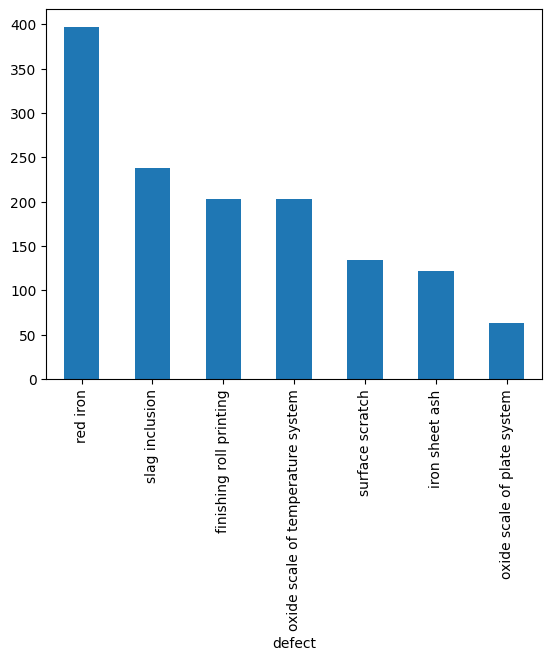

In [17]:
mydf['defect'].value_counts().plot(kind = 'bar')   #numbers of defects

<Axes: ylabel='count'>

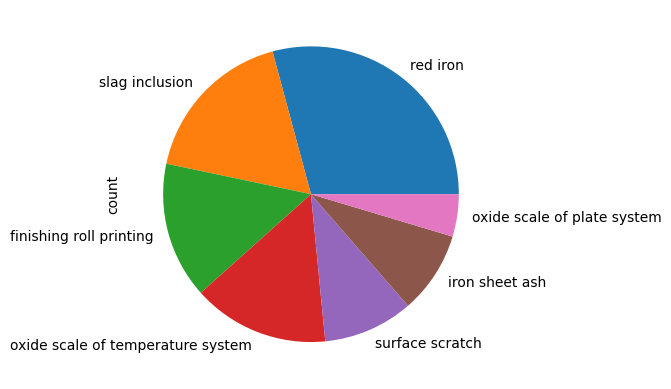

In [85]:
mydf['defect'].value_counts().plot(kind='pie', autopct='%1.1f%%')  #same as above but pie chart

# Data Preparation part 2

In [86]:
"""
def resize(image):
    resized_image = cv2.resize(image, (224,224))
    resized_image = resized_image /255.0
    return resized_image
"""

'\ndef resize(image):\n    resized_image = cv2.resize(image, (224,224))\n    resized_image = resized_image /255.0\n    return resized_image\n'

In [87]:
"""
images_to_resize = mydf['img_array']
x = []
for i in images_to_resize:
    x.append(resize(i))    
x = np.array(x)
"""

"\nimages_to_resize = mydf['img_array']\nx = []\nfor i in images_to_resize:\n    x.append(resize(i))    \nx = np.array(x)\n"

In [88]:
#plt.imshow(x[799], cmap = 'gray') #looks ok

In [89]:
#x

In [90]:
#y = mydf['defect_ID']
#y = np.array(y.values.tolist())
#y

In [91]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y) #shuffle is default

In [92]:
#y

# Creating csv for modeling

In [93]:
mydf.to_csv('dataset.csv', index=False, sep='\t')

In [94]:
df1 = pd.read_csv('dataset.csv', sep='\t')

In [95]:
df1 #ok

,filename,directory,defect,defect_ID
0,6001.jpg,datas\finishing roll printing\6001.jpg,finishing roll printing,0
1,6002.jpg,datas\finishing roll printing\6002.jpg,finishing roll printing,0
2,6003.jpg,datas\finishing roll printing\6003.jpg,finishing roll printing,0
3,6004.jpg,datas\finishing roll printing\6004.jpg,finishing roll printing,0
4,6005.jpg,datas\finishing roll printing\6005.jpg,finishing roll printing,0
...,...,...,...,...
1355,4130.jpg,datas\surface scratch\4130.jpg,surface scratch,6
1356,4131.jpg,datas\surface scratch\4131.jpg,surface scratch,6
1357,4132.jpg,datas\surface scratch\4132.jpg,surface scratch,6
1358,4133.jpg,datas\surface scratch\4133.jpg,surface scratch,6
